## Homework 5

In this notebook we will write about our solution for homework number 5.

In [104]:
import pandas as pd
from wordcloud import WordCloud
import numpy as np
import nltk
from matplotlib import pyplot as plt
import networkx as nx
import community
%matplotlib inline

Importing the data

In [105]:
emails = pd.read_csv('hillary-clinton-emails/Emails.csv')

Taking a look at the data.

In [106]:
emails.head()

,Id,DocNumber,MetadataSubject,MetadataTo,MetadataFrom,SenderPersonId,MetadataDateSent,MetadataDateReleased,MetadataPdfLink,MetadataCaseNumber,...,ExtractedTo,ExtractedFrom,ExtractedCc,ExtractedDateSent,ExtractedCaseNumber,ExtractedDocNumber,ExtractedDateReleased,ExtractedReleaseInPartOrFull,ExtractedBodyText,RawText
0,1,C05739545,WOW,H,"Sullivan, Jacob J",87.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739545...,F-2015-04841,...,NaN,"Sullivan, Jacob J <Sullivan11@state.gov>",NaN,"Wednesday, September 12, 2012 10:16 AM",F-2015-04841,C05739545,05/13/2015,RELEASE IN FULL,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
1,2,C05739546,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,H,NaN,NaN,2011-03-03T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739546...,F-2015-04841,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739546,05/13/2015,RELEASE IN PART,"B6\nThursday, March 3, 2011 9:45 PM\nH: Latest...",UNCLASSIFIED\nU.S. Department of State\nCase N...
2,3,C05739547,CHRIS STEVENS,;H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739547...,F-2015-04841,...,B6,"Mills, Cheryl D <MillsCD@state.gov>","Abedin, Huma","Wednesday, September 12, 2012 11:52 AM",F-2015-04841,C05739547,05/14/2015,RELEASE IN PART,Thx,UNCLASSIFIED\nU.S. Department of State\nCase N...
3,4,C05739550,CAIRO CONDEMNATION - FINAL,H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739550...,F-2015-04841,...,NaN,"Mills, Cheryl D <MillsCD@state.gov>","Mitchell, Andrew B","Wednesday, September 12,2012 12:44 PM",F-2015-04841,C05739550,05/13/2015,RELEASE IN PART,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
4,5,C05739554,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,"Abedin, Huma",H,80.0,2011-03-11T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739554...,F-2015-04841,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739554,05/13/2015,RELEASE IN PART,"H <hrod17@clintonemail.com>\nFriday, March 11,...",B6\nUNCLASSIFIED\nU.S. Department of State\nCa...


Let's take a look at the raw text from one e-mail. By looking throught the extracted body text we find that for a lot of emails it was not possible to extract only the body.

In [107]:
emails.ExtractedBodyText.loc[7939]

"B6\nI assume you saw this by now -- if not, it's worth a read.\nForwarded message"

But we can also see that there are not a lot of email where we have no text.

In [108]:
numNans = emails.ExtractedBodyText.isnull().sum()
print('No extracted body text in ',numNans/len(emails)*100,' %')

No extracted body text in  15.1415984896  %


We will write the text into a text file so that we do can easily use the wordcloud function.

In [109]:
textFile = open('bodyText.txt','w')

for i in range(1,len(emails)):
    textFile.write(str(emails.ExtractedSubject.values[i]))
    textFile.write(' ')
    textFile.write(str(emails.ExtractedBodyText.values[i]))
    
textFile.close()

Word cloud generation:

In [110]:
text = open('bodyText.txt','r').read()

# Generate a word cloud image
wordcloud = WordCloud().generate(text)

And showing the first wordcloud.

(-0.5, 399.5, 199.5, -0.5)

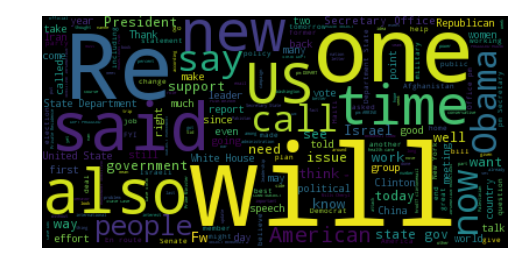

In [111]:
plt.imshow(wordcloud)
plt.axis("off")

We first see that adding the subject line to the text corpus changes the data as the "Re" is present a lot and takes a lot of space in the word cloud.

Now that we have the first word cloud, we will use nltk to generate the second one. The first step is to proceed with a tokenization of words.

In [112]:
tokens = nltk.word_tokenize(text)

# Transforming the data in a NLTK text type
text_nltk = nltk.Text(tokens)

After that we follow by removing stopwords from the text. To do so we use the stopwords corpus from nltk that we update with some expressions that are not integrated standardly. We simply create a list of words that do not contain words of the stop_words set.

In [114]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
stop_words.update(['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']',
                   'Re','Fwd'',{', '}', '<', '>', '...', '-', 'n\'t']) # remove it if you need punctuation

words_without_stop = [i.lower() for i in text_nltk if i.lower() not in stop_words]

Here we can see the first words of the whole list:

In [118]:
words_without_stop[10:15]

['syria', 'aiding', 'qaddafi', 'sid', 'hrc']

Then we perform stemming on this list using a stemmer from the nltk module. There are multiple stemmers that can be used and the choice usually depends on the application we have in mind. Here we used the Snowball stemmer.

In [119]:
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer("english") #initialization of the stemmer

words_stemmed = [stemmer.stem(t) for t in words_without_stop] # run the stemmer on each words of our list

In order to make a wordcloud we need to convert the list of words back to a string. We do so by using the .join function that join sequence of strings.

In [120]:
s = ' '; # separator for the conversion from list to string

text_final = s.join(words_stemmed)

Then again we generate a wordcloud and plot it.

In [121]:
# Generate a word cloud image
wordcloud = WordCloud().generate(text_final)

(-0.5, 399.5, 199.5, -0.5)

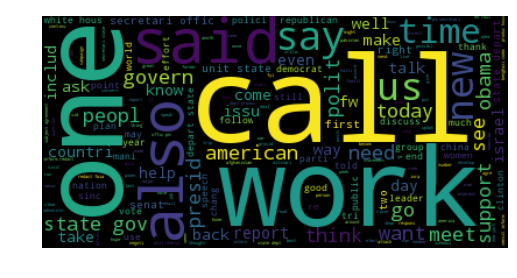

In [122]:
plt.imshow(wordcloud)
plt.axis("off")

We can see that the wordcloud is a lot different than with the previously non-processed text. There is no irrelevant stopwords highlighted. The words that are put in importance are more the central meaning of the e-mails content than before. We can also observe that some word have been shortened due to stemming which can feel odd (hous, presid, etc). This is one inconvenience of the stemming. We can see that is not perfect also in the fact that gov and govern have not been merged.

# Part two

Now we will work on sentiment analysis related to the country from wich the e-mail are linked. We start by assigning a country to each e-mail. We do this by searching in each e-mail if a there is the mention of a country (name of country code). The first country mentioned will be considered as the country of the mail. This is a little bit rudimentary but should still provide relatively good results. If there is no mention of a country, then the mail is labbelled as "no country related".

We create a mapping of country name and country code. We lower the case of the country code because we will use them as lowercase after.

In [123]:
import pycountry

mapping = {country.alpha_2.lower(): country.name for country in pycountry.countries}
dict(list(mapping.items())[10:15])

{'bh': 'Bahrain',
 'eh': 'Western Sahara',
 'gp': 'Guadeloupe',
 'kr': 'Korea, Republic of',
 'tv': 'Tuvalu'}

Now we create a liste of country name and a list of country code from pycountry

In [126]:
country_names = [x.name.lower() for x in pycountry.countries]
country_codes = [x.alpha_2.lower() for x in pycountry.countries]

Then we create a list that will contain the name of the country for each e-mail. We do that by iterating trough each e-mail body text and looking for corresponding country name or country code. This is done in two step. First we try to find country name correspondance, then if doesn't work we look for country name. If there is a country code we fill the list with the corresponding country name trough the mapping.

In [149]:
list_countries_email = [] # list of country name to be filled

for i in range(0,len(emails)):
    #We begin by putting the text in lower case as the country codes are also in lowercase
    email_tokens = nltk.word_tokenize(str(emails.ExtractedBodyText.values[i]).lower())
    country = list(set(email_tokens) & set(country_names))
    
    if not country:
        country = list(set(email_tokens) & set(country_codes)) # second try with the code of the country this time
        if not country:
            list_countries_email.append('no country related')
        else:
            country_map = mapping[country[0]] # here we map the first country code of the list to the country name
            list_countries_email.append(country_map)
    else:
        list_countries_email.append(country[0])

First we see that we miss 37% of e-mails due to not finding a country in them. It's possible that 37% of e-mails do not speak about countries.

In [150]:
print('Percentage of e-mails for which we do not have a country :',
      list_countries_email.count('no country related')/len(list_countries_email)*100)

Percentage of e-mails for which we do not have a country : 37.98615481434865


In [151]:
list_countries_email[:10]

['no country related',
 'libya',
 'no country related',
 'no country related',
 'libya',
 'Malaysia',
 'no country related',
 'libya',
 'no country related',
 'libya']

Now that we have a country for each email, we will create a new column in emails so that we store it with the text.

In [160]:
emails['Country'] = list_countries_email

#For the sentiment analysis we can drop the e-mails for which we have no country, because we are not interested in them
emailsCountry = emails[emails.Country.isin(['no country related'])==False]

Now we start working on sentiment analysis. We will again iterate trough each email body text. We perform sentiment analysis for each body text using the **demo_liu_hu_lexicon** method from **sentiment.util.demo** module. This method only count the number of good words and bad words and make a summation to obtain a label (Positive, negative or neutral). We store this results in a list as before.

In [161]:
from nltk.sentiment.util import *

/Users/thomasvetterli/anaconda/lib/python3.5/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


We will begin by droping the NaN values in the body text.

In [162]:
emailsClean = emailsCountry.dropna(subset = ['ExtractedBodyText'])

And now we do the sentiment analysis.

In [ ]:
list_sentiment_email = [] # list of result of the sentiment analysis for each email

##### Warning, the code take a long time to finish. Maybe we need to remove the nan body text to ease the computation
for i in range(1,len(emails)):
    list_sentiment_email.append(nltk.sentiment.util.demo_liu_hu_lexicon(str(emails.ExtractedBodyText.values[i])))

Neutral
Neutral
Neutral
Neutral
Negative
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Positive
Positive
Positive
Neutral
Neutral
Positive
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Negative
Neutral
Neutral
Neutral
Negative
Neutral
Neutral
Neutral
Positive
Neutral
Positive
Positive
Neutral
Positive
Neutral
Neutral
Neutral
Positive
Negative
Neutral
Neutral
Positive
Neutral
Positive
Negative
Neutral
Positive
Negative
Neutral
Positive
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Positive
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Positive
Positive
Positive
Neutral
Positive
Positive
Positive
Neutral
Neutral
Neutral
Positive
Neutral
Neutral
Neutral
Neutral
Positive
Positive
Negative
Positive
Neutral
Neutral
Neutral
Positive
Neutral
Neutral
Positive
Positive
Neutral
Neutral
Positive
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Negative
Neutral
Negative
Neutral
Neutral
Neutral
Neutral
Positive
Positive
Neutral
Positive
Neutral
Neutral
Neutral


# Part three

Now we will analyse the topics of the whole corpus using the topic modelling library Gensim.

In [10]:
from gensim.models import LdaModel, Corpora

ImportError: cannot import name 'Corpora'

In [6]:
documents = []
for i in range(1,len(emails)):
    documents.append(str(emails.ExtractedBodyText.values[i]))

Here we format the documents composed of each email body text into a suitable corpus format of Gensim

In [9]:
# remove common words and tokenize
stoplist = set('for a of the and to in 0 1 2 3 4 5 6 7 8 9 10'.split())
texts = [[word for word in document.lower().split() if word not in stoplist]
         for document in documents]

# remove words that appear only once
from collections import defaultdict
frequency = defaultdict(int)
for text in texts:
    
    for token in text:
        frequency[token] += 1

texts = [[token for token in text if frequency[token] > 1]
         for text in texts]

dictionary = corpora.Dictionary(texts)

corpus = [dictionary.doc2bow(text) for text in texts]

NameError: name 'corpora' is not defined

Now we train our model with the whole corpus

In [8]:
lda = LdaModel(corpus, num_topics=20)  # train model

NameError: name 'corpus' is not defined

## Part 4 - Graph analysis

For the graph analysis, we will first begin by taking each e-mail author, which will represent each node of the graph.

**SenderPersonId** from Emails.csv will give us the ID of the person that sent the e-mail, and by linking the e-mail ID of Emails.csv to **EmailsReceivers.csv** we can find the id of the person that received the email, and therefore create a link between these two.

We begin by creating one node per alias:

In [9]:
senders = pd.read_csv('hillary-clinton-emails/Aliases.csv')
senders.head()

,Id,Alias,PersonId
0,1,111th congress,1
1,2,agna usemb kabul afghanistan,2
2,3,ap,3
3,4,asuncion,4
4,5,alec,5


As we do not need the aliases, we just keep the ID.

In [12]:
personId = senders.PersonId.values

#Creating a graph
graph = nx.Graph()

Then we can add all the person ID's as nodes.

In [ ]:
graph.add_nodes_from(personId)

Now we go into the other csv to draw the links.

In [34]:
receiverdf = pd.read_csv('hillary-clinton-emails/EmailReceivers.csv')
#We keep only the EmailID and PersonId
receiverID = receiverdf[['EmailId','PersonId']]
receiverID.head()

,EmailId,PersonId
0,1,80
1,2,80
2,3,228
3,3,80
4,4,80


Now we go into the **Emails.csv** to find the link between emailId, receiver and sender,

In [32]:
senderdf = pd.read_csv('hillary-clinton-emails/Emails.csv')
senderID = senderdf[['Id','SenderPersonId']]

#As there are a few NaN's we drop these columns
senderID  = senderID.dropna()

#We need to put the ID's in int otherwise we will not be able to build the graph
senderID = senderID.astype(int)
senderID.head()

,Id,SenderPersonId
0,1,87
2,3,32
3,4,32
4,5,80
5,6,80


Now we merge the two to have the links.

In [37]:
linksID = pd.merge(senderID,receiverID,left_on='Id',right_on='EmailId')

#And we keep the columns of interest in the dataframe
linksID = linksID[['SenderPersonId','PersonId']]
linksID.head()

,SenderPersonId,PersonId
0,87,80
1,32,228
2,32,80
3,32,80
4,80,81


Now that we have a dataframe with one row per link we will add these links to the graph.

In [48]:
for l in linksID.index:
    link = linksID.loc[l].values
    graph.add_edge(link[0],link[1])

Now we can visualize the graph

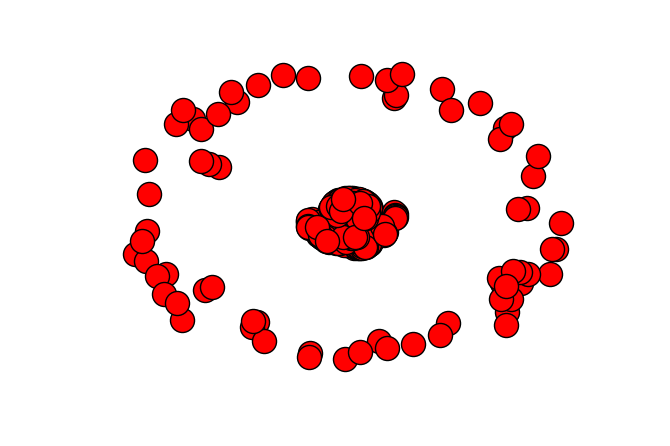

In [94]:
nx.draw(graph,pos=nx.spring_layout(graph))
plt.show()

We see that some nodes do not have neighbors (data errors). We will begin by removing them as they will not help us for our community detection.

In [99]:
for i in graph.nodes():
    if not graph.neighbors(i):
        graph.remove_node(i)

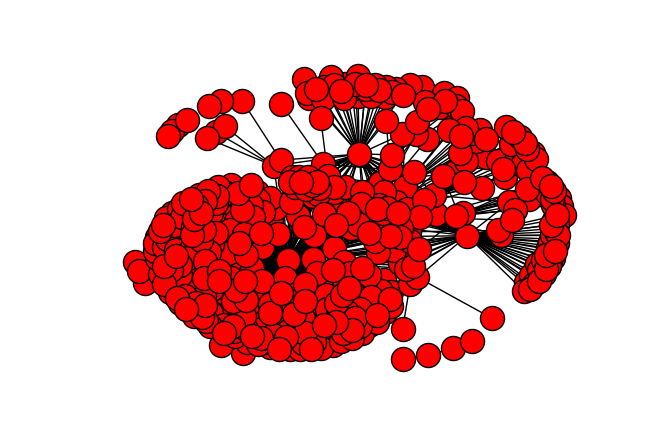

In [100]:
nx.draw(graph,pos=nx.spring_layout(graph))
plt.show()

Now that we have taken care of the nodes that do not belong to a community, we can start with the community detection.

Please note that these visulazations are only used to be sure that the data we have is useful for further analysis (i.e no nodes without edges), and we know that the do not bring a lot of information other than this one.

In [102]:
#first compute the best partition
partition = community.best_partition(graph)

And we use the example from [community detection](http://perso.crans.org/aynaud/communities/index.html) to draw the graph in communities.

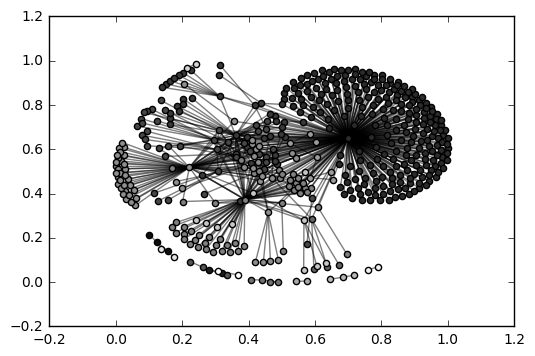

In [103]:
size = float(len(set(partition.values())))
pos = nx.spring_layout(graph)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(graph, pos, list_nodes, node_size = 20,
                                node_color = str(count / size))


nx.draw_networkx_edges(graph,pos, alpha=0.5)
plt.show()

We can already see the different cmunities (different shades of gray), we will know analyze them by word usage!